In [13]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(color_codes=True)
#sns.set(font='SimHei', font_scale=2.5)
plt.rcParams['axes.grid'] = False

#import numpy as np

#import pandas as pd
#pd.options.display.max_rows = 20

#import sklearn

#import itertools

#import logging
#logger = logging.getLogger()

from IPython.display import Image

tf.train.Optimizer - 优化器模块简介
=========

优化器模块的逻辑结构是相对简单清晰的，它主要是计算出梯度(compute_gradients)，再算出合适的更新量，应用到对应的变量上去(apply_gradients)。[官方API页](https://www.tensorflow.org/versions/master/api_docs/python/tf/train/Optimizer)讲得很详细，不再赘言。

主要结构如下图：

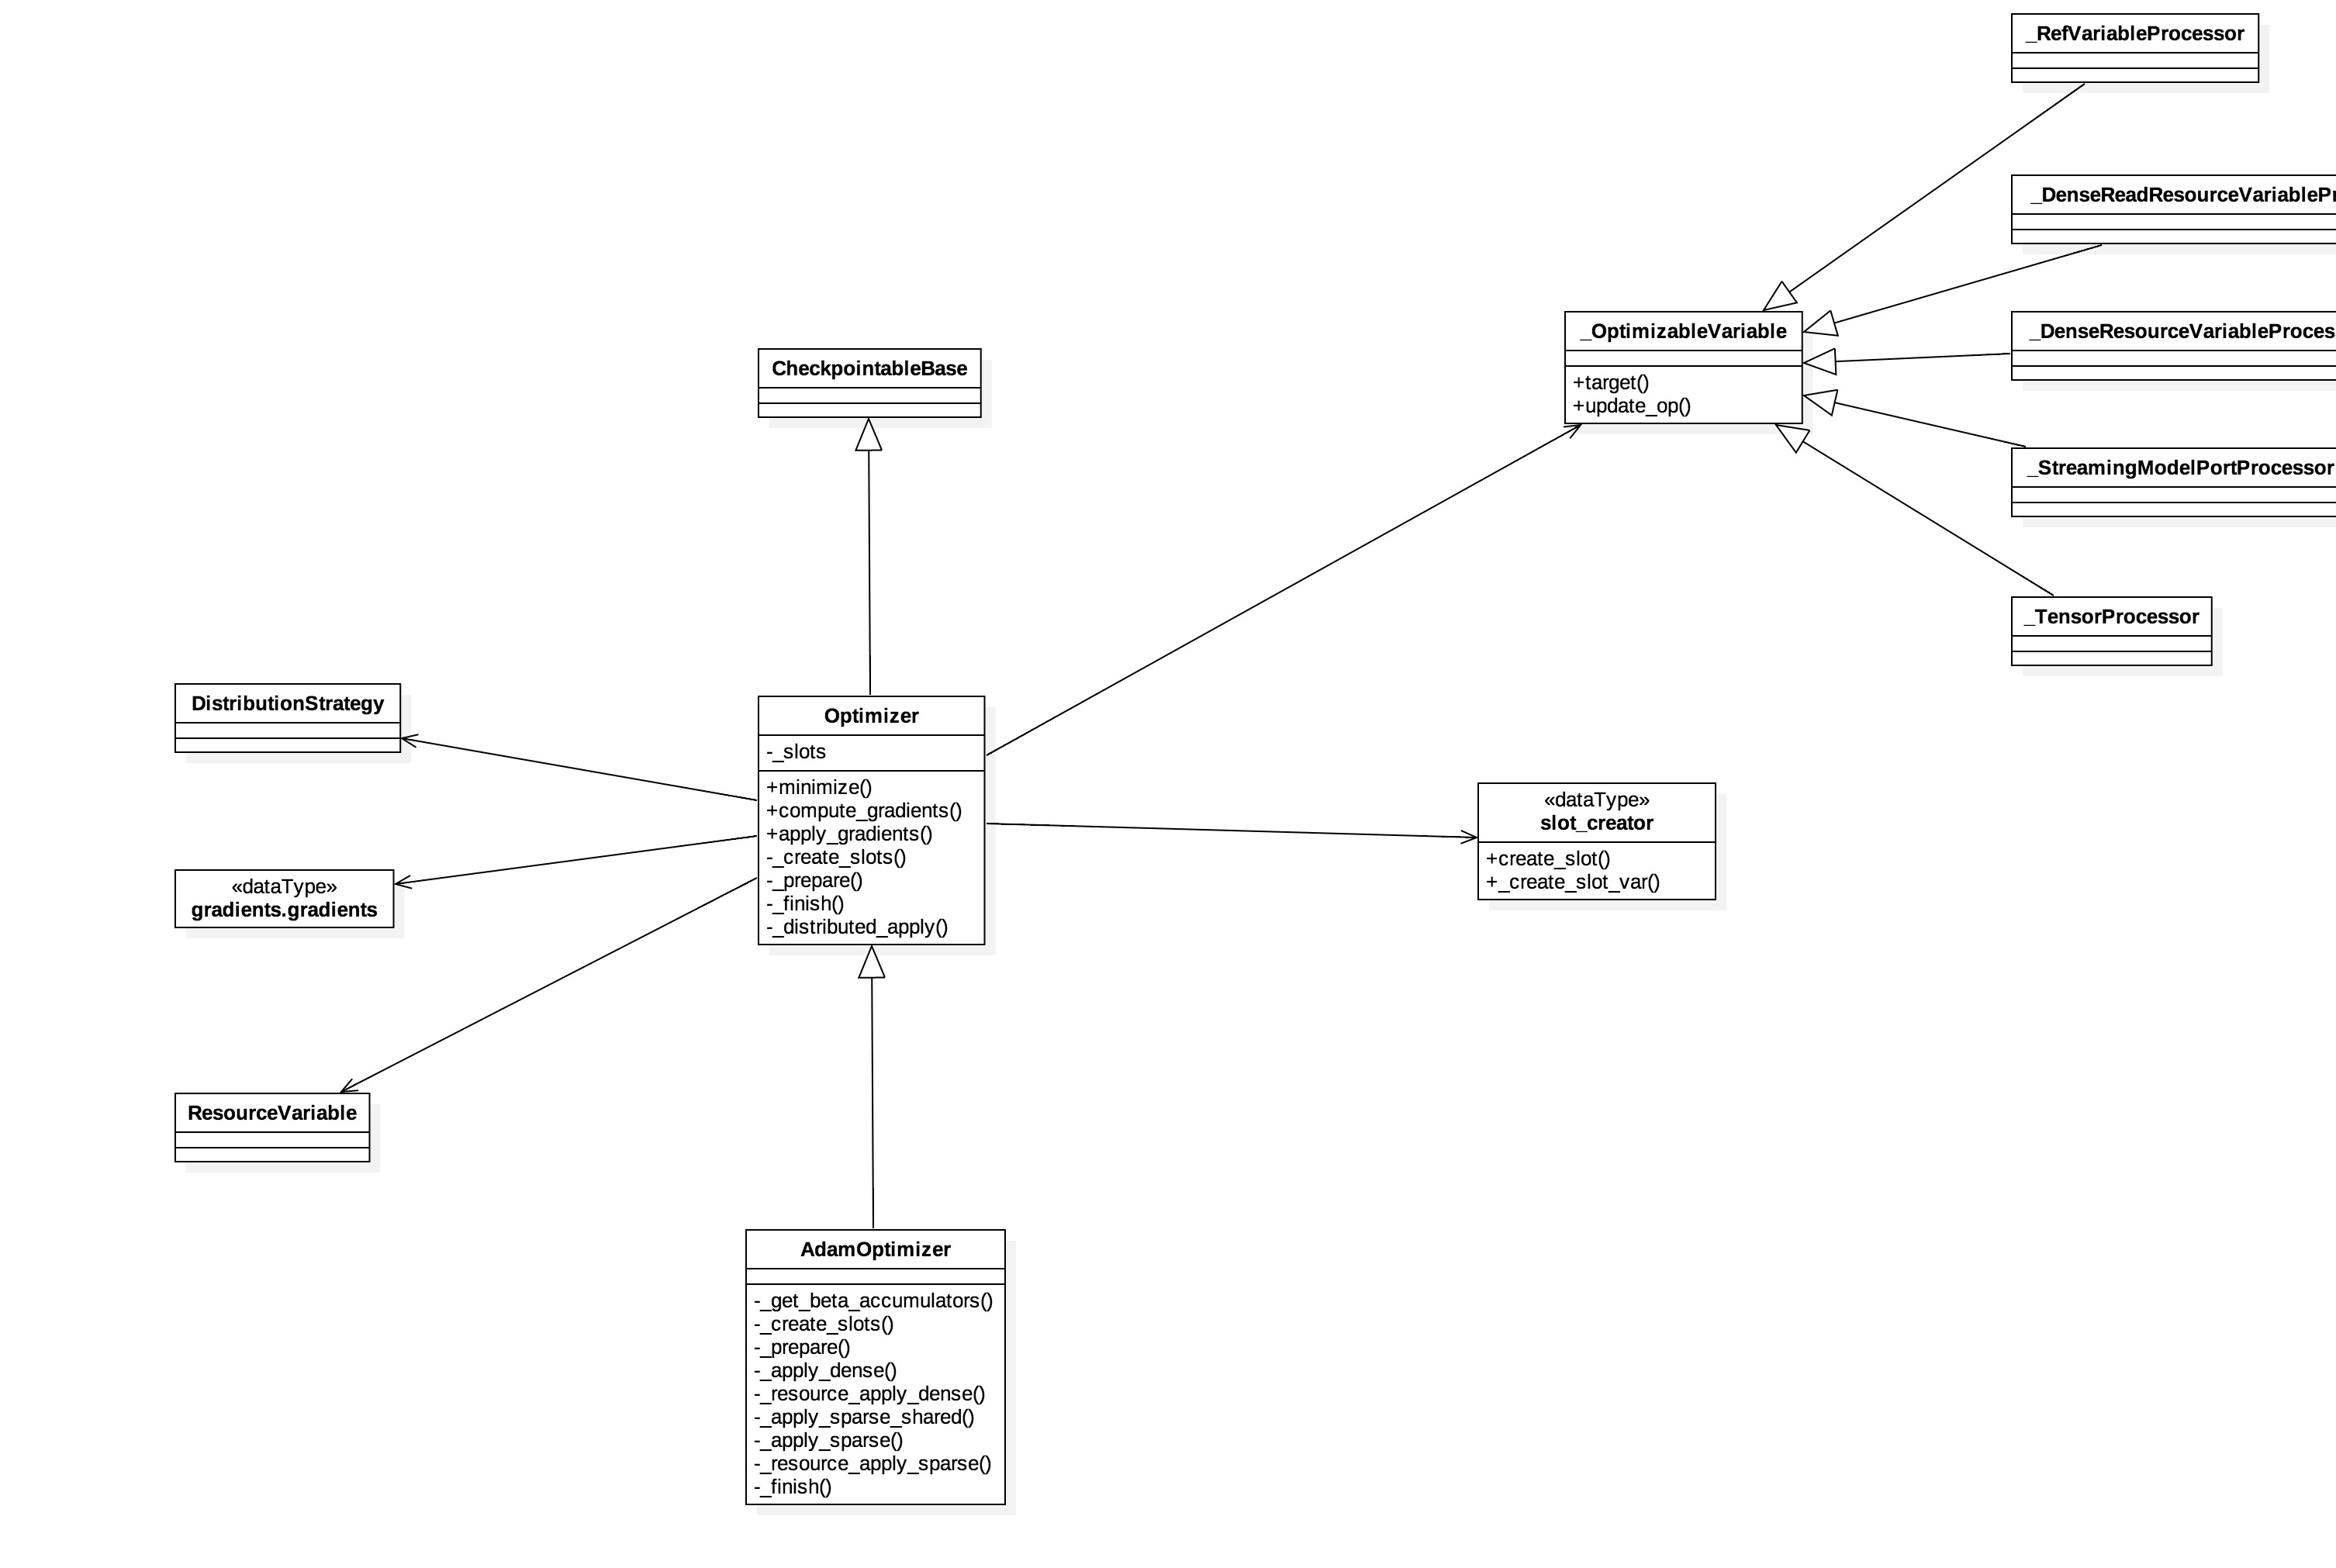

In [12]:
Image(filename='./res/optimizer.jpg')

有几个概念比较有意思，我尝试说下自己的理解：

+ slots: 它们也是变量，只是依附于每个变量的一些状态信息，比如历史梯度值一类。
  - non-slots: 优化器用于计算的全局信息。
+ compute_gradients参数：
  - gate_gradients: 这个把它理解成grads要不要相互同步，可能更好想。
  - colocate_gradients_with_ops：梯度和对应算子，放在同样设备上(tf.devices)。
+ `_apply_*`和`_resource_apply_*`这些方法会被_OptimizableVariable自动调用，很多时候重载这些方法就可以，复用apply_gradients逻辑。

In [15]:
import tensorflow as tf
tf.__version__

'1.8.0-dev20180331'

In [31]:
with tf.Graph().as_default():
    summaries_dir = "./opt"
    a = tf.placeholder(dtype=tf.float32, shape=(10, 2), name='a')
    b = tf.get_variable('b', shape=(2, 1), dtype=tf.float32)
    loss = tf.cumsum(tf.matmul(a, b), name='loss')

    opt = tf.train.AdamOptimizer()
    train_op = opt.minimize(loss)
    
    with tf.Session() as sess:
        writer = tf.summary.FileWriter(summaries_dir + '/train', sess.graph)